<a href="https://colab.research.google.com/github/abhayratti/CNN-with-Pytorch-CIFAR-10-/blob/main/CIFAR_10_CNN_from_Scratch.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [41]:
import torch
import torchvision
import torchvision.transforms as transforms

In [42]:
trainset = torchvision.datasets.CIFAR10(root='./content',
                                        train=True, # asking for training data
                                        download=True, 
                                        transform=transforms.ToTensor()) # convert images to tensors

Files already downloaded and verified


In [43]:
trainset

Dataset CIFAR10
    Number of datapoints: 50000
    Root location: ./content
    Split: Train
    StandardTransform
Transform: ToTensor()

In [44]:
# want to feed training data into nn in batches
trainloader = torch.utils.data.DataLoader(trainset,
                                          batch_size=8, # 8 images per batch
                                          shuffle=True, # randomize data
                                          num_workers=2) # 2 subprocesses for data loading

In [45]:
testset = torchvision.datasets.CIFAR10(root='./datasets',
                                       train=False, # asking for test data
                                       download=True,
                                       transform=transforms.ToTensor())

Files already downloaded and verified


In [46]:
testset 

Dataset CIFAR10
    Number of datapoints: 10000
    Root location: ./datasets
    Split: Test
    StandardTransform
Transform: ToTensor()

In [47]:
testloader = torch.utils.data.DataLoader(testset,
                                         batch_size=8,
                                         shuffle=False, # no need for randomization 
                                         num_workers=2)

In [48]:
labels = ('plane', 'car', 'bird', 'cat', 'deer', 
          'dog', 'frog', 'horse', 'ship', 'truck')

In [49]:
import matplotlib.pyplot as plt
import numpy as np

In [66]:
trainiter = iter(trainloader)
images_batch, labels_batch = next(trainiter)

In [51]:
images_batch.shape # [batch size, channels (rgb), height, width]

torch.Size([8, 3, 32, 32])

In [52]:
img = torchvision.utils.make_grid(images_batch) # create grid of images in this batch

In [53]:
img.shape # [channels, height, width] 8 images with 2 pixel padding between them - 

torch.Size([3, 36, 274])

In [54]:
np.transpose(img, (1, 2, 0)).shape # height is 1st dimension, then width, then # of channels

torch.Size([36, 274, 3])

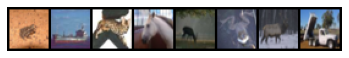

In [55]:
plt.imshow(np.transpose(img, (1, 2, 0)))
plt.axis('off')
plt.show()

In [56]:
import torch.nn as nn

In [57]:
input_size = 3 # number of channels
hid1_size = 16 # number of channels output by 1st convolutional layer (feature maps=16)
hid2_size = 32 # number of channels output by 2nd convolutional layer (feature maps=32)
out_size = len(labels) 
k_conv_size = 5 # 5 x 5 convolutional kernel used

In [58]:
class ConvNet(nn.Module):
  def __init__(self):
    super(ConvNet, self).__init__()

    self.layer1 = nn.Sequential( # sequential = groups of layers 
        nn.Conv2d(input_size, hid1_size, k_conv_size), # convolutional layer (only need to specify # of input + output channels, size and batch size is inferred by layer)
        nn.BatchNorm2d(hid1_size), # normalize output of this layer for one batch so there's 0 mean and unit variance 
        nn.ReLU(),
        nn.MaxPool2d(kernel_size=2)) # max pooling layer w/ 2x2 kernel 
    
    self.layer2 = nn.Sequential(
        nn.Conv2d(hid1_size, hid2_size, k_conv_size), # pooling layers do not change number of input features 
        nn.BatchNorm2d(hid2_size),
        nn.ReLU(),
        nn.MaxPool2d(kernel_size=2)) 
    
    self.fc = nn.Linear(hid2_size * k_conv_size * k_conv_size, out_size) # at this point number of features to represent an image: 32 x 5 x 5 = 320

  def forward(self, x): # x is input
    out = self.layer1(x)
    out = self.layer2(out)
    out = out.reshape(out.size(0), -1) # reshape the output so each image is a 1D vector to feed into linear layer
    out = self.fc(out)

    return out

In [59]:
model = ConvNet()

In [60]:
learning_rate = 0.001

criterion = nn.CrossEntropyLoss() # distance between probability distributions (loss function)

optimizer = torch.optim.Adam(model.parameters(),
                             lr=learning_rate)

In [61]:
total_step = len(trainloader)
num_epochs = 20

In [62]:
for epoch in range (num_epochs):
  for i, (images, labels) in enumerate(trainloader):

    outputs = model(images)
    loss = criterion(outputs, labels)

    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    if (i+1) % 2000 == 0:
      print ('Epoch [{}/{}], Step [{}/{}], Loss: {:.4f}'.format(epoch+1, num_epochs, i+1, total_step, loss.item()))

Epoch [1/20], Step [2000/6250], Loss: 1.1950
Epoch [1/20], Step [4000/6250], Loss: 0.8713
Epoch [1/20], Step [6000/6250], Loss: 1.3313
Epoch [2/20], Step [2000/6250], Loss: 0.7182
Epoch [2/20], Step [4000/6250], Loss: 1.6269
Epoch [2/20], Step [6000/6250], Loss: 1.1784
Epoch [3/20], Step [2000/6250], Loss: 0.6876
Epoch [3/20], Step [4000/6250], Loss: 1.1021
Epoch [3/20], Step [6000/6250], Loss: 0.9133
Epoch [4/20], Step [2000/6250], Loss: 1.3466
Epoch [4/20], Step [4000/6250], Loss: 0.4763
Epoch [4/20], Step [6000/6250], Loss: 0.2206
Epoch [5/20], Step [2000/6250], Loss: 1.2440
Epoch [5/20], Step [4000/6250], Loss: 0.9870
Epoch [5/20], Step [6000/6250], Loss: 1.1167
Epoch [6/20], Step [2000/6250], Loss: 0.4759
Epoch [6/20], Step [4000/6250], Loss: 1.6457
Epoch [6/20], Step [6000/6250], Loss: 0.7940
Epoch [7/20], Step [2000/6250], Loss: 1.1573
Epoch [7/20], Step [4000/6250], Loss: 0.8646
Epoch [7/20], Step [6000/6250], Loss: 0.6546
Epoch [8/20], Step [2000/6250], Loss: 1.5131
Epoch [8/2

In [65]:
model.eval() # put model into testing mode 
with torch.no_grad():
  correct = 0
  total = 0 
  for images, labels in testloader:
    
    outputs = model(images)
    _, predicted = torch.max(outputs.data, 1) # choose output with highest probability 

    total += labels.size(0) # total number of test instances
    correct += (predicted == labels).sum().item() # total number of correct predictions (predicted == labels)

  print('Accuracy of the model: {}%'.format(100 * correct / total))

Accuracy of the model: 69.53%


**Model is pretty clearly overfitted ^**